This notebook contains analysis on family demographics for years 2007 to 2017.

In [1]:
#Importing packages
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.ticker import ScalarFormatter

import seaborn as sns

In [2]:
#Importing the data as panda dataframe
df_comp = pd.read_csv('dbFamilyComposition2007-2017.csv')

df_comp.head()

,REF_DATE,GEO,DGUID,Family type,Family composition,Parent characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2007,"Montréal, Quebec",2016S0503462,All families,Families with or without children,All parental age groups,Number,223,units,0,v21211314,14.1.1.1,998510.0,NaN,NaN,NaN,0
1,2008,"Montréal, Quebec",2016S0503462,All families,Families with or without children,All parental age groups,Number,223,units,0,v21211314,14.1.1.1,1008240.0,NaN,NaN,NaN,0
2,2009,"Montréal, Quebec",2016S0503462,All families,Families with or without children,All parental age groups,Number,223,units,0,v21211314,14.1.1.1,1015770.0,NaN,NaN,NaN,0
3,2010,"Montréal, Quebec",2016S0503462,All families,Families with or without children,All parental age groups,Number,223,units,0,v21211314,14.1.1.1,1025120.0,NaN,NaN,NaN,0
4,2011,"Montréal, Quebec",2016S0503462,All families,Families with or without children,All parental age groups,Number,223,units,0,v21211314,14.1.1.1,1035400.0,NaN,NaN,NaN,0


In [3]:
#Quick look at the data:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REF_DATE                4940 non-null   int64  
 1   GEO                     4940 non-null   object 
 2   DGUID                   4940 non-null   object 
 3   Family type             4940 non-null   object 
 4   Family composition      4940 non-null   object 
 5   Parent characteristics  4940 non-null   object 
 6   UOM                     4940 non-null   object 
 7   UOM_ID                  4940 non-null   int64  
 8   SCALAR_FACTOR           4940 non-null   object 
 9   SCALAR_ID               4940 non-null   int64  
 10  VECTOR                  4940 non-null   object 
 11  COORDINATE              4940 non-null   object 
 12  VALUE                   4940 non-null   float64
 13  STATUS                  0 non-null      float64
 14  SYMBOL                  0 non-null      

In [4]:
#Checking for columns with only one unique value (they can be dropped since they hold one similar value for all rows):
for col in df_comp:
    print("Unique values in column", col, "are:", df_comp[col].unique())

Unique values in column REF_DATE are: [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
Unique values in column GEO are: ['Montréal, Quebec' 'Toronto, Ontario' 'Calgary, Alberta'
 'Edmonton, Alberta' 'Vancouver, British Columbia'
 'Ottawa - Gatineau, combined Ontario/Quebec']
Unique values in column DGUID are: ['2016S0503462' '2016S0503535' '2016S0503825' '2016S0503835'
 '2016S0503933' '2016S0503505']
Unique values in column Family type are: ['All families' 'Couple families' 'Lone-parent families']
Unique values in column Family composition are: ['Families with or without children' 'Families with no children'
 'Families with 1 child' 'Families with 2 children'
 'Families with 3 or more children' 'Average family size'
 'Average size of families with children']
Unique values in column Parent characteristics are: ['All parental age groups' 'Older parent aged 35 to 44 years'
 'Older parent aged 65 years and over' 'Median total income']
Unique values in column UOM are: ['Number' 'Dol

In [5]:
#Dropping the empty columns (columns with 0 non-null count):
df_comp = df_comp.drop(['STATUS', 'SYMBOL', 'TERMINATED'], axis=1)

#Dropping columns that do not contribute information for the analysis:
df_comp = df_comp.drop(['DGUID', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'DECIMALS'], axis=1)

df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4940 entries, 0 to 4939
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   REF_DATE                4940 non-null   int64  
 1   GEO                     4940 non-null   object 
 2   Family type             4940 non-null   object 
 3   Family composition      4940 non-null   object 
 4   Parent characteristics  4940 non-null   object 
 5   VALUE                   4940 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 231.7+ KB


In [6]:
df_comp.head()

,REF_DATE,GEO,Family type,Family composition,Parent characteristics,VALUE
0,2007,"Montréal, Quebec",All families,Families with or without children,All parental age groups,998510.0
1,2008,"Montréal, Quebec",All families,Families with or without children,All parental age groups,1008240.0
2,2009,"Montréal, Quebec",All families,Families with or without children,All parental age groups,1015770.0
3,2010,"Montréal, Quebec",All families,Families with or without children,All parental age groups,1025120.0
4,2011,"Montréal, Quebec",All families,Families with or without children,All parental age groups,1035400.0


In [7]:
df_comp['Family type'].unique()

array(['All families', 'Couple families', 'Lone-parent families'],
      dtype=object)

In [8]:
df_comp['Family composition'].unique()

array(['Families with or without children', 'Families with no children',
       'Families with 1 child', 'Families with 2 children',
       'Families with 3 or more children', 'Average family size',
       'Average size of families with children'], dtype=object)

In [9]:
df_comp['Parent characteristics'].unique()

array(['All parental age groups', 'Older parent aged 35 to 44 years',
       'Older parent aged 65 years and over', 'Median total income'],
      dtype=object)

In [10]:
#The individual categories of families with 0, 1, 2, 3 or more children cover the broad category of "Families with or 
#without children". Therefore, rows of "Families with or without children" can be dropped:
df1 = df_comp.loc[df_comp['Family composition'] != 'Families with or without children']

#Selecting rows of data which contain information on Toronto, Vancouver, and Calgary:
df_toronto = df1.loc[df1['GEO'] == 'Toronto, Ontario']
df_vancouver = df1.loc[df1['GEO'] == 'Vancouver, British Columbia']
df_calgary = df1.loc[df1['GEO'] == 'Calgary, Alberta']

df_family = pd.concat([df_toronto, df_vancouver, df_calgary], axis=0)
df_family

,REF_DATE,GEO,Family type,Family composition,Parent characteristics,VALUE
880,2007,"Toronto, Ontario",All families,Families with no children,All parental age groups,494390.0
881,2008,"Toronto, Ontario",All families,Families with no children,All parental age groups,508330.0
882,2009,"Toronto, Ontario",All families,Families with no children,All parental age groups,521060.0
883,2010,"Toronto, Ontario",All families,Families with no children,All parental age groups,530030.0
884,2011,"Toronto, Ontario",All families,Families with no children,All parental age groups,541170.0
...,...,...,...,...,...,...
2503,2013,"Calgary, Alberta",Lone-parent families,Average size of families with children,Median total income,51270.0
2504,2014,"Calgary, Alberta",Lone-parent families,Average size of families with children,Median total income,53060.0
2505,2015,"Calgary, Alberta",Lone-parent families,Average size of families with children,Median total income,53630.0
2506,2016,"Calgary, Alberta",Lone-parent families,Average size of families with children,Median total income,53250.0


Looking at family compositions (for all families) in the three cities of Toronto, Vancouver, and Calgary:

In [11]:
#Creating a dataframe without the family compositions of "Average family size" and "Average size of families with children"
#and also with only "All families" as family type and for "All parental age groups" in parent characteristics:
df_familycomp = df_family.loc[(df_family['Family composition'] != 'Average family size') &
                             (df_family['Family composition'] != 'Average size of families with children') &
                             (df_family['Family type'] == 'All families') &
                             (df_family['Parent characteristics'] == 'All parental age groups')]

df_familycomp

,REF_DATE,GEO,Family type,Family composition,Parent characteristics,VALUE
880,2007,"Toronto, Ontario",All families,Families with no children,All parental age groups,494390.0
881,2008,"Toronto, Ontario",All families,Families with no children,All parental age groups,508330.0
882,2009,"Toronto, Ontario",All families,Families with no children,All parental age groups,521060.0
883,2010,"Toronto, Ontario",All families,Families with no children,All parental age groups,530030.0
884,2011,"Toronto, Ontario",All families,Families with no children,All parental age groups,541170.0
...,...,...,...,...,...,...
1854,2013,"Calgary, Alberta",All families,Families with 3 or more children,All parental age groups,37770.0
1855,2014,"Calgary, Alberta",All families,Families with 3 or more children,All parental age groups,39030.0
1856,2015,"Calgary, Alberta",All families,Families with 3 or more children,All parental age groups,40380.0
1857,2016,"Calgary, Alberta",All families,Families with 3 or more children,All parental age groups,41440.0


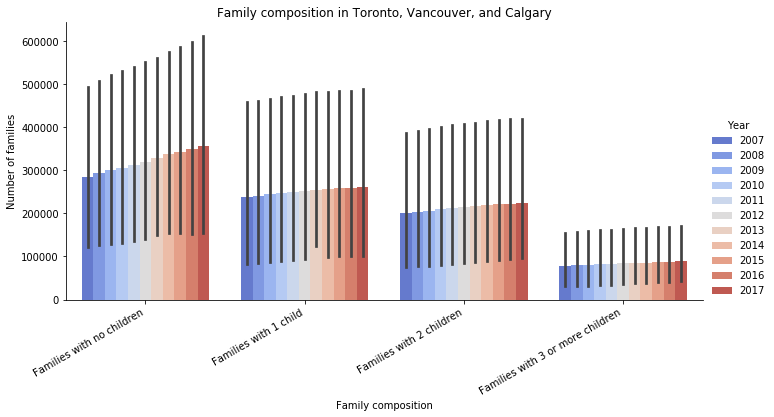

In [12]:
fig1 = sns.catplot(x='Family composition', y='VALUE', hue='REF_DATE', kind='bar', palette='coolwarm', data=df_familycomp, 
                   height=5, aspect=10/5)
fig1.set(xlabel='Family composition', ylabel='Number of families', 
         title='Family composition in Toronto, Vancouver, and Calgary')
fig1._legend.set_title("Year")
fig1.fig.autofmt_xdate();

As seen in plot, families with no children show the highest rate of increase in numbers over the years. For quantifying these results:

In [13]:
#Grouping by family composition and year:
df_group1 = df_familycomp.groupby(['Family composition', 'REF_DATE']).VALUE.mean().reset_index()

#Calculating percent change for each family composition in each year:
df_group1['Percent_Change'] = df_group1['VALUE'].pct_change()

#The pct_change() function calculates changes in values compared to their previous row. The year "2007" rows can be 
#dropped since data for their preceding years are not available in the dataframe, and therefore their calculated 
#pct_change() is meaningless in the context of our analysis.
df_group2 = df_group1.loc[df_group1['REF_DATE'] != 2007]

#Averaging the percent changes for each family composition:
df_group2 = df_group2.groupby(['Family composition']).Percent_Change.mean().reset_index()
df_group2

,Family composition,Percent_Change
0,Families with 1 child,0.009183
1,Families with 2 children,0.010789
2,Families with 3 or more children,0.011755
3,Families with no children,0.022602


As calculated above, while families with no children have a growth rate of 2.3%, the growth rate for families with 1, 2, and 3 or more children are in the range of 0.9% to 1.2%. The growth rate of families with no children has almost been twice as the growth rate of other family compositions from 2007 to 2017.

The large error bars in the plot above are due to the averaging over the three different cities. For a more accurate understanding, the analysis of growth rate of different family compositions is broken down into individual investigations for each city. For Toronto:

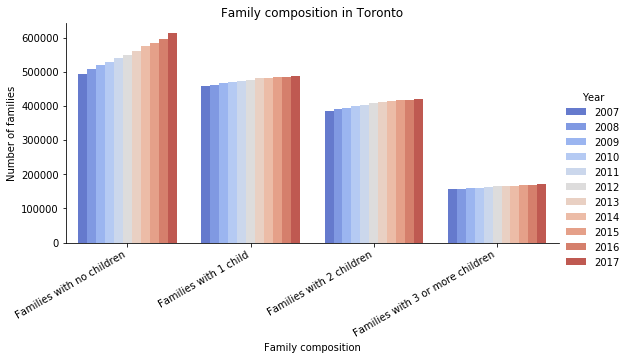

In [14]:
df_familycomp_tor = df_familycomp.loc[(df_familycomp['GEO'] == 'Toronto, Ontario')].reset_index()

fig2 = sns.catplot(x='Family composition', y='VALUE', hue='REF_DATE', kind='bar', palette='coolwarm', 
                   data=df_familycomp_tor, height=4, aspect=8/4)
fig2.set(xlabel='Family composition', ylabel='Number of families', title='Family composition in Toronto')
fig2._legend.set_title("Year")
fig2.fig.autofmt_xdate();

In Toronto, families with no children show the most growth while families with 3 or more children show the minimum rate of growth. Results will be quantified following the plots for Vancouver and Calgary.

For Vancouver:

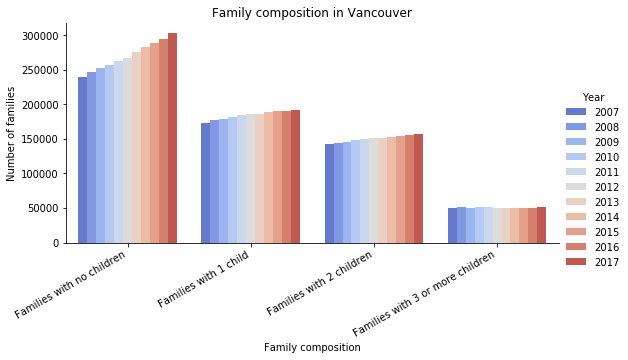

In [15]:
df_familycomp_van = df_familycomp.loc[(df_familycomp['GEO'] == 'Vancouver, British Columbia')].reset_index()

fig3 = sns.catplot(x='Family composition', y='VALUE', hue='REF_DATE', kind='bar', palette='coolwarm', 
                   data=df_familycomp_van, height=4, aspect=8/4)
fig3.set(xlabel='Family composition', ylabel='Number of families', title='Family composition in Vancouver')
fig3._legend.set_title("Year")
fig3.fig.autofmt_xdate();

In Vancouver, similar to Toronto, families with no children show the most growth while families with 3 or more children have the least amount of growth. Results will be quantified following the plots for Calgary.

For Calgary:

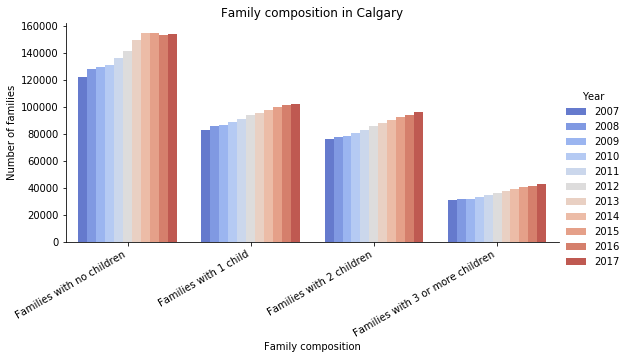

In [16]:
df_familycomp_cal = df_familycomp.loc[(df_familycomp['GEO'] == 'Calgary, Alberta')].reset_index()

fig2 = sns.catplot(x='Family composition', y='VALUE', hue='REF_DATE', kind='bar', palette='coolwarm', 
                   data=df_familycomp_cal, height=4, aspect=8/4)
fig2.set(xlabel='Family composition', ylabel='Number of families', title='Family composition in Calgary')
fig2._legend.set_title("Year")
fig2.fig.autofmt_xdate();

In Calgary, while families with no children show the most growth similar to the results for Toronto and Vancouver, families with 3 or more children also show a positive rate of growth unlike Toronto and Vancouver. 

For quantifying the above results:

In [17]:
#Grouping by city, family composition, and year:
df_group_cities = df_familycomp.groupby(['GEO', 'Family composition', 'REF_DATE']).VALUE.mean().reset_index()

#Calculating percent change for each family composition in each year:
df_group_cities['Percent_Change'] = df_group_cities['VALUE'].pct_change()

#The pct_change() function calculates changes in values compared to their previous row. The year "2007" rows can be 
#dropped since data for their preceding years are not available in the dataframe, and therefore their calculated 
#pct_change() is meaningless in the context of our analysis.
df_group_cities_2 = df_group_cities.loc[df_group_cities['REF_DATE'] != 2007]

#Averaging the percent changes for each family composition:
df_group_cities_2 = df_group_cities_2.groupby(['GEO', 'Family composition']).Percent_Change.mean().reset_index()
df_group_cities_2

,GEO,Family composition,Percent_Change
0,"Calgary, Alberta",Families with 1 child,0.021260
1,"Calgary, Alberta",Families with 2 children,0.023538
2,"Calgary, Alberta",Families with 3 or more children,0.034791
3,"Calgary, Alberta",Families with no children,0.023796
4,"Toronto, Ontario",Families with 1 child,0.006319
5,"Toronto, Ontario",Families with 2 children,0.008572
6,"Toronto, Ontario",Families with 3 or more children,0.009683
7,"Toronto, Ontario",Families with no children,0.021781
8,"Vancouver, British Columbia",Families with 1 child,0.010582
9,"Vancouver, British Columbia",Families with 2 children,0.009527


As calculated above, the growth rate for families with no children is in the same range of 2.2% and 2.4% for all three cities. However, for families with 3 or more children a different trend is observed among the three cities. While for families with 3 or more children, Toronto and Vancouver show average growth rates of 1% and 0.2%, respectively, Calgary shows a significant difference with an average growth rate of 3.5% for families with 3 or more children. 

In general, and as shown in calculations below, the average growth rate for all family compositions in Calgary are more than twice the respective values in Toronto and Vancouver. While the average growth rate for all family compositions is 2.6% for Calgary, this value is equal to only 1.1% for both Toronto and Vancouver (calculations below).

In [18]:
df_group_cities_3 = df_group_cities_2.groupby(['GEO']).Percent_Change.mean().reset_index()
df_group_cities_3

,GEO,Percent_Change
0,"Calgary, Alberta",0.025846
1,"Toronto, Ontario",0.011589
2,"Vancouver, British Columbia",0.011537


The growth rates of couple-families and lone parent families can also be explored:

In [19]:
#Creating a dataframe without the family compositions of "Average family size" and "Average size of families with children"
#and also with only "couple families" and "lone-parent families" as family type (without "all families")
#and for "All parental age groups" in parent characteristics:
df_couple_lone = df_family.loc[(df_family['Family composition'] != 'Average family size') &
                             (df_family['Family composition'] != 'Average size of families with children') &
                             (df_family['Family type'] != 'All families') &
                             (df_family['Parent characteristics'] == 'All parental age groups')]

df_couple_lone

,REF_DATE,GEO,Family type,Family composition,Parent characteristics,VALUE
1188,2007,"Toronto, Ontario",Couple families,Families with no children,All parental age groups,494390.0
1189,2008,"Toronto, Ontario",Couple families,Families with no children,All parental age groups,508330.0
1190,2009,"Toronto, Ontario",Couple families,Families with no children,All parental age groups,521060.0
1191,2010,"Toronto, Ontario",Couple families,Families with no children,All parental age groups,530030.0
1192,2011,"Toronto, Ontario",Couple families,Families with no children,All parental age groups,541170.0
...,...,...,...,...,...,...
2426,2013,"Calgary, Alberta",Lone-parent families,Families with 3 or more children,All parental age groups,4680.0
2427,2014,"Calgary, Alberta",Lone-parent families,Families with 3 or more children,All parental age groups,4740.0
2428,2015,"Calgary, Alberta",Lone-parent families,Families with 3 or more children,All parental age groups,5040.0
2429,2016,"Calgary, Alberta",Lone-parent families,Families with 3 or more children,All parental age groups,5120.0


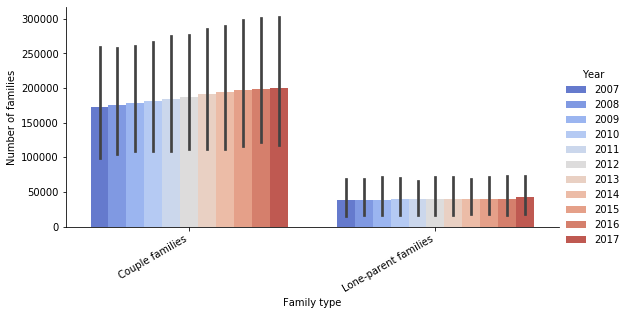

In [20]:
fig5 = sns.catplot(x='Family type', y='VALUE', hue='REF_DATE', kind='bar', palette='coolwarm', data=df_couple_lone, 
                   height=4, aspect=8/4)
fig5.set(xlabel='Family type', ylabel='Number of families')
fig5._legend.set_title("Year")
fig5.fig.autofmt_xdate();

Couple families tend to have a steady increasing growth rate, while lone-parent families do not seem to have any significant growth over the years. For quantifying these observations:

In [21]:
#Grouping by family type:
df_group3 = df_couple_lone.groupby(['Family type']).VALUE.mean().reset_index()
df_group3

,Family type,VALUE
0,Couple families,187530.303030
1,Lone-parent families,39792.323232


While the average number of couple families is 187,500, this count drops down to 39,800 for lone-parent families.

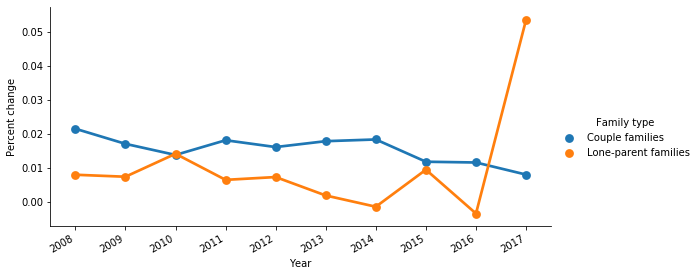

In [22]:
#Grouping by family type and year:
df_group4 = df_couple_lone.groupby(['Family type', 'REF_DATE']).VALUE.mean().reset_index()

#Calculating percent change for each family type in each year:
df_group4['Percent_Change'] = df_group4['VALUE'].pct_change()

#The pct_change() function calculates changes in values compared to their previous row. The year "2007" rows can be 
#dropped since data for their preceding years are not available in the dataframe, and therefore their calculated 
#pct_change() is meaningless in the context of our analysis.
df_group5 = df_group4.loc[df_group4['REF_DATE'] != 2007]

fig6 = sns.catplot(x='REF_DATE', y='Percent_Change', hue='Family type', kind='point', data=df_group5, 
                   height=4, aspect=8/4)
fig6.set(xlabel='Year', ylabel='Percent change')
fig6._legend.set_title("Family type")
fig6.fig.autofmt_xdate();

While the growth rate of couple families is higher than the growth rate of lone-parent families in most years, in 2017, the growth rate of lone-parent families jumps to more than 5 times of growth rate of couple families.

In [23]:
#Averaging the percent changes for each family type:
df_group5 = df_group5.groupby(['Family type']).Percent_Change.mean().reset_index()
df_group5

,Family type,Percent_Change
0,Couple families,0.015489
1,Lone-parent families,0.010400


On average, the growth rate of couple families is 1.5%, 0.5% higher than the average growth rate of lone-parent families.

Exploring the changes in average family size from 2007 to 2017 in each of the three cities:

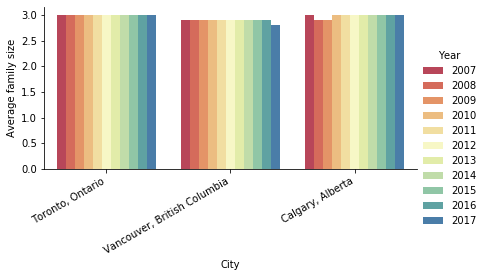

In [24]:
#Creating a dataframe with the family compositions of "Average family size" and also with 
#only "All families" as family type and for "All parental age groups" in parent characteristics:
df_familysize = df_family.loc[(df_family['Family composition'] == 'Average family size') &
                             (df_family['Family type'] == 'All families') &
                             (df_family['Parent characteristics'] == 'All parental age groups')]

fig7 = sns.catplot(x='GEO', y='VALUE', hue='REF_DATE', kind='bar', palette='Spectral', 
                   data=df_familysize, height=3, aspect=6/3)
fig7.set(xlabel='City', ylabel='Average family size')
fig7._legend.set_title("Year")
fig7.fig.autofmt_xdate();

As seen, the average family size in all three cities has not had significant changes over the years and has hovered around an average size of 3 through all years investigated here. Breaking this analysis down to average size of families with children:

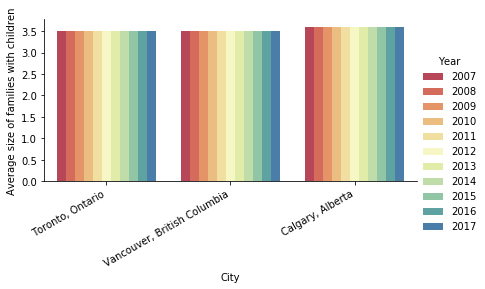

In [25]:
#Creating a dataframe with the family compositions of "Average size of families with children" and also 
#with only "All families" as family type and for "All parental age groups" in parent characteristics:
df_familysize_withchild = df_family.loc[(df_family['Family composition'] == 'Average size of families with children') &
                             (df_family['Family type'] == 'All families') &
                             (df_family['Parent characteristics'] == 'All parental age groups')]

fig8 = sns.catplot(x='GEO', y='VALUE', hue='REF_DATE', kind='bar', palette='Spectral',
                   data=df_familysize_withchild, height=3, aspect=6/3)
fig8.set(xlabel='City', ylabel='Average size of families with children')
fig8._legend.set_title("Year")
fig8.fig.autofmt_xdate();

Similar to average size for all families, average size of families with children also has remained unchanged throughout the years in all three cities.

For insight on relationships between income and family compositions, the dataset is further explored below.

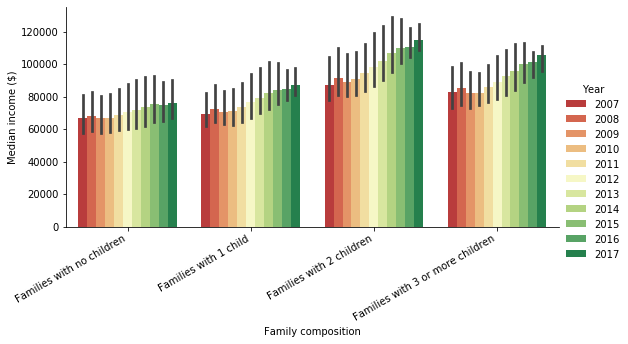

In [26]:
#Creating a dataframe without the family compositions of "Average family size" and "Average size of families with children"
#and also with only "All families" as family type and for "All parental age groups" in parent characteristics:
df_income = df_family.loc[(df_family['Family composition'] != 'Average size of families with children') &
                          (df_family['Family composition'] != 'Average family size') & 
                          (df_family['Family type'] == 'All families') & 
                          (df_family['Parent characteristics'] == 'Median total income')]

fig9 = sns.catplot(x='Family composition', y='VALUE', hue='REF_DATE', kind='bar', data=df_income, 
                   palette='RdYlGn', height=4, aspect=8/4)
fig9.set(xlabel='Family composition', ylabel='Median income ($)')
fig9._legend.set_title("Year")
fig9.fig.autofmt_xdate();

In general, the average income of all family compositions has increased over the years and families with 2 children seem to have the highest income. For quantifying these observations:

In [27]:
#Grouping by family composition and year:
df_group6 = df_income.groupby(['Family composition', 'REF_DATE']).VALUE.mean().reset_index()

#Calculating percent change between each two years for each family composition:
df_group6['Percent_Change'] = df_group6['VALUE'].pct_change()

#The pct_change() function calculates changes in values compared to their previous row. The year "2007" rows can be 
#dropped since data for their preceding years are not available in the dataframe, and therefore their calculated 
#pct_change() is meaningless in the context of our analysis.
df_group7 = df_group6.loc[df_group6['REF_DATE'] != 2007]

#Averaging the percent changes for each family composition:
df_group7 = df_group7.groupby(['Family composition']).Percent_Change.mean().reset_index()
df_group7

,Family composition,Percent_Change
0,Families with 1 child,0.023856
1,Families with 2 children,0.027939
2,Families with 3 or more children,0.024579
3,Families with no children,0.013718


As calculated above, families with no children have the lowest rate of income increase over the years with 1.4%. This is while families with 2 children have an average income increase rate twice as that with 2.8%. Families with 1 child and families with 3 or more children have income increase rates of 2.4% and 2.5% respectively.

In [28]:
df_group6_mean = df_group6.groupby(['Family composition']).VALUE.mean().reset_index()
df_group6_mean

,Family composition,VALUE
0,Families with 1 child,77318.181818
1,Families with 2 children,99589.090909
2,Families with 3 or more children,91170.909091
3,Families with no children,70820.909091


As seen above, the highest income earners are families with 2 children with a median income of 99,600, while families with no children seem to have the lowest average income with median value of 70,800.

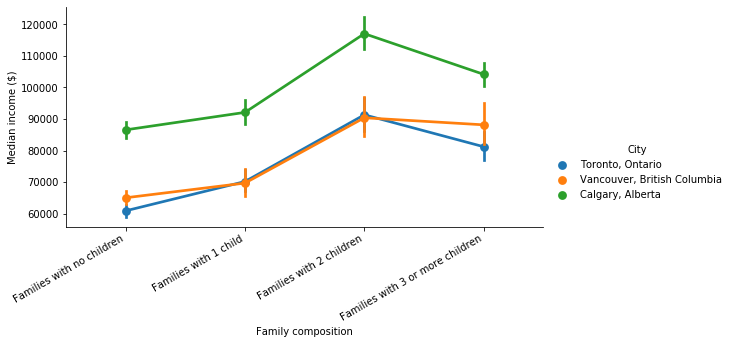

In [29]:
fig10 = sns.catplot(x='Family composition', y='VALUE', hue='GEO', kind='point', data=df_income, 
                   height=4, aspect=8/4)
fig10.set(xlabel='Family composition', ylabel='Median income ($)')
fig10._legend.set_title("City")
fig10.fig.autofmt_xdate();

While the median income for all family compositions is similar between Toronto and Vancouver, all family compositions in Calgary have a higher income compared to their similar family compositions in Toronto and Vancouver. Calculations below show families in Calgary having an average 32% and 28% higher income compared to families in Toronto and Vancouver, respectively. 

In [30]:
#Grouping by city and family composition:
df_group8 = df_income.groupby(['GEO', 'Family composition']).VALUE.mean().reset_index()

#Creating dataframe for comparing Calgary and Toronto:
df_group_cal_tor = df_group8.loc[(df_group8['GEO'] == 'Calgary, Alberta') | (df_group8['GEO'] == 'Toronto, Ontario')]

#Sorting to get the following order in "GEO": Toronto, Calgary
df_group_cal_tor = df_group_cal_tor.sort_values(['GEO', 'Family composition'], ascending=[False, True])

#Calculating percent change between Toronto and Calgary for each family composition (gap of 4 rows):
df_group_cal_tor['Percent_Change'] = df_group_cal_tor['VALUE'].pct_change(4)

#The pct_change(4) function calculates changes in values compared to their 4 previous row. The "Toronto, Ontario" rows 
#can be dropped since their calculated pct_change(4) is meaningless in the context of our analysis.
df_group_cal_tor_pct = df_group_cal_tor.loc[df_group_cal_tor['GEO'] != 'Toronto, Ontario']

#Averaging the percent changes:
df_group_cal_tor_pct = df_group_cal_tor_pct.groupby(['GEO']).Percent_Change.mean().reset_index()
df_group_cal_tor_pct

,GEO,Percent_Change
0,"Calgary, Alberta",0.324598


In [31]:
#Grouping by city and family composition:
df_group8 = df_income.groupby(['GEO', 'Family composition']).VALUE.mean().reset_index()

#Creating dataframe for comparing Calgary and Vancouver:
df_group_cal_van = df_group8.loc[(df_group8['GEO'] == 'Calgary, Alberta') | (df_group8['GEO'] == 'Vancouver, British Columbia')]

#Sorting to get the following order in "GEO": Vancouver, Calgary
df_group_cal_van = df_group_cal_van.sort_values(['GEO', 'Family composition'], ascending=[False, True])

#Calculating percent change between Vancouver and Calgary for each family composition (gap of 4 rows):
df_group_cal_van['Percent_Change'] = df_group_cal_van['VALUE'].pct_change(4)

#The pct_change(4) function calculates changes in values compared to their 4 previous row. 
#The "Vancouver, British Columbia" rows can be dropped since their calculated pct_change(4) is meaningless in the 
#context of our analysis.
df_group_cal_van_pct = df_group_cal_van.loc[df_group_cal_van['GEO'] != 'Vancouver, British Columbia']

#Averaging the percent changes:
df_group_cal_van_pct = df_group_cal_van_pct.groupby(['GEO']).Percent_Change.mean().reset_index()
df_group_cal_van_pct

,GEO,Percent_Change
0,"Calgary, Alberta",0.282355


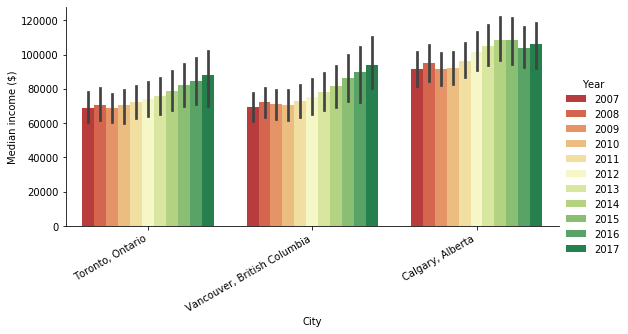

In [32]:
fig11 = sns.catplot(x='GEO', y='VALUE', hue='REF_DATE', kind='bar', data=df_income, 
                   palette='RdYlGn', height=4, aspect=8/4)
fig11.set(xlabel='City', ylabel='Median income ($)')
fig11._legend.set_title("Year")
fig11.fig.autofmt_xdate();

The plot above shows a general increase in average income from 2007 to 2017 for Toronto and Vancouver. Calgary follows an increasing trend from 2007 to 2014 which is then followed by a slight decreasing trend. However, even with the slight decrease, Calgary seems to have the highest average income among the three cities.

In [33]:
#Grouping by city:
df_group9 = df_income.groupby(['GEO']).VALUE.mean().reset_index()
df_group9

,GEO,VALUE
0,"Calgary, Alberta",99965.909091
1,"Toronto, Ontario",75897.727273
2,"Vancouver, British Columbia",78310.681818


As shown above, while the median income for families in Calgary is close to 100,000, the average income for families in Toronto and Vancouver is around 75,900 and 78,300, respectively. For quantifying the average rate of income increase over the years in these three cities:

In [34]:
#Grouping by city and year:
df_group10 = df_income.groupby(['GEO', 'REF_DATE']).VALUE.mean().reset_index()

#Calculating percent change between each two years for each city:
df_group10['Percent_Change'] = df_group10['VALUE'].pct_change()

#The pct_change() function calculates changes in values compared to their previous row. The year "2007" rows can be 
#dropped since data for their preceding years are not available in the dataframe, and therefore their calculated 
#pct_change() is meaningless in the context of our analysis.
df_group11 = df_group10.loc[df_group10['REF_DATE'] != 2007]

#Averaging the percent changes for each city:
df_group11 = df_group11.groupby(['GEO']).Percent_Change.mean().reset_index()
df_group11

,GEO,Percent_Change
0,"Calgary, Alberta",0.015388
1,"Toronto, Ontario",0.025219
2,"Vancouver, British Columbia",0.030948


Even though Calgary had the highest average income among the three cities, it has the lowest rate of income increase compared to Toronto and Vancouver. While for the period of 2007 to 2017, Toronto and Vancouver have average income increase rates of 2.5% and 3.1%, respectively, Calgary has an average income increase rate of only 1.6%, almost half of Vancouver's rate.